In [1]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 468.0 kB/s eta 0:00:00m eta 0:00:010:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.5.3-py3-none-any.whl size=14820 sha256=763d104f63fcd37d79593a6f1f3924ee90620b445534693cfb4e887fa2bf7e30
  Stored in directory: /home/shahrayar/.cache/pip/wheels/2e/bf/38/838f7a301971b6fa2915069198ae7b48a21833d156ef170960
Successfully built gdown

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install plotly

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4a8fdd;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATASET](#2)
    
* [3. DATA CLEANING](#3)
    
    * [3.1. REMOVING URLs](#3.1)    
    * [3.2. LOWER CASE](#3.2)    
    * [3.3. REMOVING PUNCTUATIONS](#3.3)    
    * [3.4. REMOVING EXTRA WHITESPACES](#3.4)    
    * [3.5. REMOVING STOPWORDS](#3.5)    
    * [3.6. APPLYING LEMMATIZATION](#3.6)
    
    
* [4. MOST FREQUENT WORDS IN SPAM DATA](#4)   
    
* [5. MOST FREQUENT WORDS IN HAM DATA](#5) 
      
* [6. BALANCING DATASET](#6)
    
* [7. LABELING CATEGORICAL FEATURE](#7)
    
* [8. TOKENIZATION](#8)
    
* [9. TRAIN TEST SPLIT](#9)
    
* [10. TRAINING DEEP LEARNING MODEL](#10)

* [11. PLOTTING MODEL LAYERS](#11)

* [12. TRAINING MODEL](#12)

* [13. VISUALIZING ACCURACY & LOSS](#13)

* [14. MODEL EVUALATION](#14)

* [15. CLASSIFICATION REPORT](#15)    

* [16. CONFUSION MATRIX](#16)    
    
* [17. MODEL PREDICTION](#17)

<a id="1"></a>

## <b>1 <span style='color:#4a8fdd'>|</span> IMPORTING LIBRARIES</b>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

from nlpaug.util import Action
import nlpaug.augmenter.word as word_augmenter

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten, Bidirectional, LSTM, GRU

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

<a id="2"></a>

## <b>2 <span style='color:#4a8fdd'>|</span> LOADING DATASET</b>

In [3]:
df = pd.read_csv("SPAM text message 20170820 - Data.csv")

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### <b>SHAPE OF DATAFRAME</b>

In [4]:
print(f"Shape of dataset is: {df.shape}")

Shape of dataset is: (5572, 2)


#### <b>UNIQUE CATEGORIES</b>

In [5]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

#### <b>CHECKING NAN VALUES</b>

In [6]:
pd.DataFrame(df.isnull().sum(), columns=['Missing Counts'])

,Missing Counts
Category,0
Message,0


<b>NO MISSING VALUE FOUND</b>

#### <b>COUNTS OF CATEGORIES</b>

In [7]:
pd.DataFrame(df['Category'].value_counts()).style.background_gradient()

,Category
ham,4825
spam,747


In [8]:
ham_percentage = (df['Category'].value_counts()[0] * 100) / df.shape[0]
spam_percentage = (df['Category'].value_counts()[1] * 100) / df.shape[0]

print(f'Percentage of ham data is: { round(ham_percentage, 2) }')
print(f'Percentage of spam data is: {round(spam_percentage, 2)}')

Percentage of ham data is: 86.59
Percentage of spam data is: 13.41


In [9]:
fig = px.pie(df, names = "Category",
             title = "<b>Counts in Category</b>",             
             color_discrete_sequence=px.colors.sequential.Blackbody_r,             
             hole = 0.5)

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20))

fig.update_traces(textposition='inside',
                  textinfo='percent+label',    
                  textfont_size=15,                  
                  marker=dict(line=dict(color='#000000', width = 1.5)))


fig.show()

#### <b>CLEARLY SHOWS THAT THE DATA IS IMBALANCED, I WILL BALANCED IT LATER...</b>

<a id="3"></a>

## <b>3 <span style='color:#4a8fdd'>|</span> DATA CLEANING</b>

In [10]:
STOPWORDS = stopwords.words('english')
PUNCTUATION = string.punctuation

<a id="3.1"></a>

#### <b>3.1 <span style='color:#4a8fdd'>|</span> REMOVING URLS</b>

In [11]:
def remove_urls(text):    
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [12]:
df['Message'] = df['Message'].apply(remove_urls)

<a id="3.2"></a>

#### <b>3.2 <span style='color:#4a8fdd'>|</span> LOWER CASE</b>

In [13]:
df['Message'] = df['Message'].str.lower()

In [14]:
df.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


<a id="3.3"></a>

#### <b>3.3 <span style='color:#4a8fdd'>|</span> REMOVING PUNCTUATIONS</b>

In [15]:
def remove_punctuation(series):
    no_punctuation = "".join([word for word in series if word not in PUNCTUATION])
    return no_punctuation

In [16]:
df['Message'] = df['Message'].apply(remove_punctuation)

<a id="3.4"></a>

#### <b>3.4 <span style='color:#4a8fdd'>|</span> REMOVING EXTRA WHITESPACES</b>

In [17]:
def remove_extra_white_spaces(series):
    single_char_pattern = r'\s+[a-zA-Z]\s+'
    without_sc = re.sub(pattern=single_char_pattern, repl=" ", string = series)
    return without_sc

In [18]:
df['Message'] = df['Message'].apply(remove_extra_white_spaces)

<a id="3.5"></a>

#### <b>3.5 <span style='color:#4a8fdd'>|</span> REMOVING STOPWORDS</b>

In [19]:
def remove_stopwords(text):
    no_stopwords = []    
    tokens = word_tokenize(text)
    
    for i in range(len(tokens)):
        if tokens[i] not in STOPWORDS:
            no_stopwords.append(tokens[i])
            
    return " ".join(no_stopwords)

In [20]:
df["Message"] = df["Message"].apply(remove_stopwords)

<a id="3.6"></a>

#### <b>3.6 <span style='color:#4a8fdd'>|</span> APPLYING LEMMATIZATION</b>

In [21]:
def lemmatize_text(text):    
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

In [22]:
df['Message'] = df['Message'].apply(lemmatize_text)

#### <b>LENGTH OF SENTENCES</b>

In [23]:
df['Message_Length'] = df['Message'].apply(len)

In [24]:
df.head()

,Category,Message,Message_Length
0,ham,go jurong point crazy available bugis great wo...,78
1,ham,ok lar joking wif oni,21
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,135
3,ham,u dun say early hor c already say,33
4,ham,nah dont think go usf life around though,40


<a id="4"></a>

## <b>4 <span style='color:#4a8fdd'>|</span> MOST FREQUENT WORDS IN SPAM DATA</b>

In [25]:
spam_df = df[df['Category'] == 'spam']

spam_df = spam_df.reset_index().drop('index', axis=1)

In [26]:
spam_counter = Counter()

for sent in spam_df['Message'].values:
    for word in sent.split():
        if word.lower() not in STOPWORDS:
            spam_counter[word] += 1

In [27]:
top_spam_words = pd.DataFrame(spam_counter.most_common(20), columns=['Spam Words', 'Counts'])
top_spam_words.style.background_gradient()

,Spam Words,Counts
0,call,356
1,free,216
2,2,173
3,txt,150
4,ur,144
5,text,137
6,mobile,135
7,4,119
8,stop,115
9,claim,113


In [28]:
COLOR = "#4a8fdd"

In [29]:
fig = px.histogram(top_spam_words,
                   x = 'Spam Words',
                   color_discrete_sequence=[COLOR],
                   y = 'Counts', title="<b>Top 20 Spam Words in dataset</b>")

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20))


fig.show()

In [30]:
def plot_word_cloud(dataframe, series):
    try:
        text = ' '.join(dataframe[series])

        wordcloud = WordCloud(width = 1600 , height = 800, 
                              background_color ='black',                          
                              max_words=2000,
                              max_font_size=300,
                              min_font_size = 20).generate(text)

        plt.figure(figsize=(12, 8), facecolor = 'k', edgecolor = 'k' )
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis("off")
        plt.tight_layout(pad = 0) 
        plt.show()
    
    except TypeError:
        print("Expected str instance")

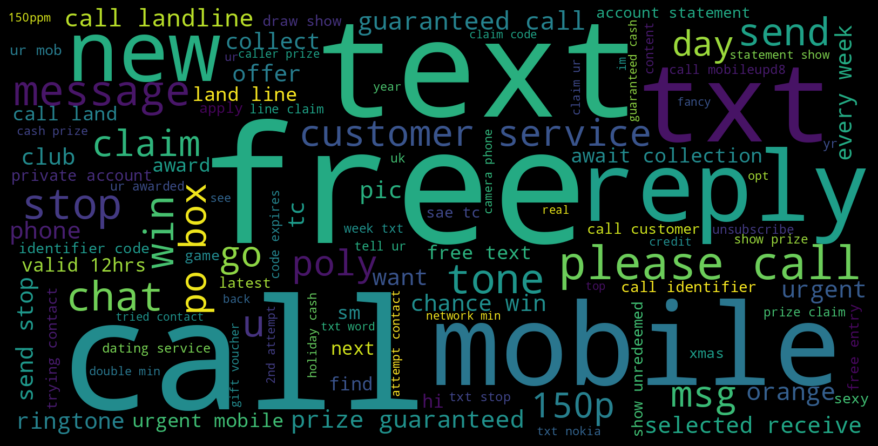

In [31]:
plot_word_cloud(spam_df, "Message")

<a id="5"></a>

## <b>5 <span style='color:#4a8fdd'>|</span> MOST FREQUENT WORDS IN HAM DATA</b>

In [32]:
ham_df = df[df['Category'] == 'ham']

ham_df = ham_df.reset_index().drop('index', axis=1)

In [33]:
ham_counter = Counter()

for sent in ham_df['Message'].values:
    for word in sent.split():
        if word.lower() not in STOPWORDS:
            ham_counter[word] += 1

In [34]:
top_ham_words = pd.DataFrame(ham_counter.most_common(20), columns=['Ham Words', 'Counts'])
top_ham_words.style.background_gradient()

,Ham Words,Counts
0,im,451
1,get,314
2,2,309
3,go,276
4,ltgt,276
5,ok,273
6,dont,265
7,ur,246
8,come,245
9,got,244


In [35]:
fig = px.histogram(top_ham_words,
                   x = 'Ham Words',
                   color_discrete_sequence=[COLOR],
                   y = 'Counts', title="<b>Top 20 Ham Words in dataset</b>")

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20))


fig.show()

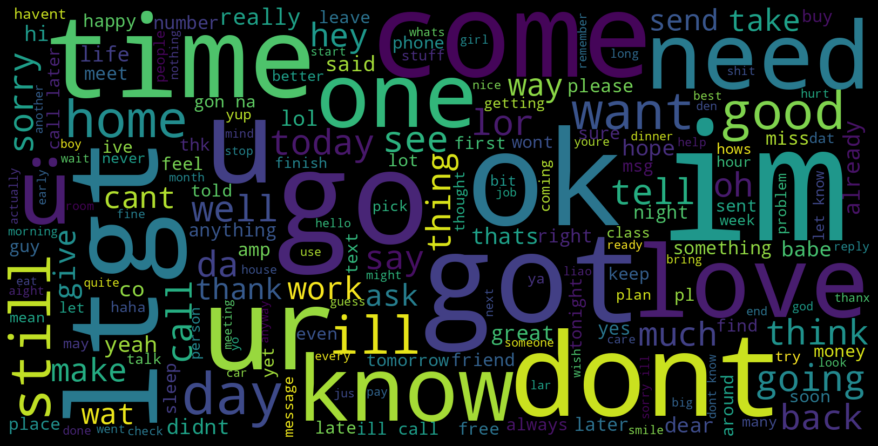

In [36]:
plot_word_cloud(ham_df, "Message")

<a id="6"></a>

## <b>6 <span style='color:#4a8fdd'>|</span> BALANCING DATASET</b>

<b>AS DATASET IS IMBALANCED, SO BALANCED IT WITH TEXT AUGMENTATION TECHNIQUE</b>

<b>APPLYING WORD AUGMENTER ON SPAM DATA</b>

In [37]:
w_augmenter = word_augmenter.SynonymAug(aug_src='wordnet')

In [38]:
ITERATIONS = 5

# augment data 5 times
def augment_data(dataframe, series, iterations):    
    aug_list = list()        
    
    try:        
        for i in range(iterations):
            for j in range(len(spam_df)):
                aug_text = w_augmenter.augment(dataframe[series][j])
                aug_list.append(aug_text)

        return aug_list
    
    except:
        print("Something went wrong")

In [39]:
aug_spam_list = augment_data(spam_df, "Message", ITERATIONS)

In [40]:
len(aug_spam_list)

3735

In [41]:
spam_df_aug = pd.DataFrame(aug_spam_list, columns=['Message'])
spam_df_aug.head()

,Message
0,free entry 2 wkly comp win fa cupful concludin...
1,freemsg hey darling 3 week word backwards i.d....
2,winner valued network customer selected receiv...
3,mobile 11 month gas constant entitled update l...
4,six chance make headway cash hundred 20000 pou...


In [42]:
spam_df_aug['Category'] = ['spam' for i in range(len(spam_df_aug))]

<b>FINDING THE LENGTH OF WORDS IN `spam_df_aug`</b>

In [43]:
spam_df_aug['Message_Length'] = spam_df_aug['Message'].apply(len)

<b>NOW COMBINING `spam_df` and `spam_df_aug`</b>

In [44]:
spam_df = pd.concat([spam_df, spam_df_aug])
spam_df.head()

,Category,Message,Message_Length
0,spam,free entry 2 wkly comp win fa cup final tkts 2...,135
1,spam,freemsg hey darling 3 week word back id like f...,87
2,spam,winner valued network customer selected receiv...,120
3,spam,mobile 11 month r entitled update latest colou...,105
4,spam,six chance win cash 100 20000 pound txt csh11 ...,108


<b>NOW REMOVING DUPLICATE RECORDS IN `spam_df` (IF ANY)</b>

In [45]:
spam_df.drop_duplicates(inplace=True)

<b>NOW COMBINING `ham_df` and `spam_df`</b>

In [46]:
df = pd.concat([ham_df, spam_df], axis=0)
df = df.reset_index().drop('index', axis=1)

In [47]:
df.head()

,Category,Message,Message_Length
0,ham,go jurong point crazy available bugis great wo...,78
1,ham,ok lar joking wif oni,21
2,ham,u dun say early hor c already say,33
3,ham,nah dont think go usf life around though,40
4,ham,even brother like speak treat like aid patent,45


<b>NOW FINDING THE COUNTS OF `Category` IN DATAFRAME</b>

In [48]:
pd.DataFrame(df['Category'].value_counts()).style.background_gradient()

,Category
ham,4825
spam,4258


In [49]:
fig = px.pie(df, names = "Category",
             title = "<b>Counts in Category</b>",
             color_discrete_sequence=px.colors.sequential.Blackbody_r,
             hole = 0.5)

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20))

fig.update_traces(textposition='inside',
                  textinfo='percent+label',    
                  textfont_size=15,                  
                  marker=dict(line=dict(color='#000000', width = 1.5)))


fig.show()

<b>DATA IS NOW BALANCED</b>

<a id="7"></a>

## <b>7 <span style='color:#4a8fdd'>|</span> LABELING CATEGORICAL FEATURE</b>

In [50]:
df['Category'] = df['Category'].map({"spam" : 1,
                                     "ham" : 0})

In [51]:
df.head()

,Category,Message,Message_Length
0,0,go jurong point crazy available bugis great wo...,78
1,0,ok lar joking wif oni,21
2,0,u dun say early hor c already say,33
3,0,nah dont think go usf life around though,40
4,0,even brother like speak treat like aid patent,45


<a id="8"></a>

## <b>8 <span style='color:#4a8fdd'>|</span> TOKENIZATION</b>

In [52]:
message = df['Message'].values
category = df['Category'].values

In [53]:
VOCAB_SIZE = 1000
MAX_LEN = df['Message_Length'].max()
EMBEDDING_VECTOR_SIZE = 6

In [54]:
encoded_message = [one_hot(msg, VOCAB_SIZE) for msg in message]

In [55]:
padded_message = pad_sequences(encoded_message, maxlen=MAX_LEN, padding='post')

In [56]:
X = padded_message
y = category

<a id="9"></a>

## <b>9 <span style='color:#4a8fdd'>|</span> TRAIN TEST SPLIT</b>

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

<a id="10"></a>

## <b>10 <span style='color:#4a8fdd'>|</span> CREATING DEEP LEARNING MODEL</b>

In [58]:
model = Sequential()
model.add(Embedding(VOCAB_SIZE, EMBEDDING_VECTOR_SIZE, input_length = MAX_LEN, name='Embedding'))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(GRU(64)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2022-05-25 14:23:27.398588: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 14:23:27.399833: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 14:23:27.400524: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 14:23:27.401478: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 513, 6)            6000      
_________________________________________________________________
bidirectional (Bidirectional (None, 513, 256)          138240    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               123648    
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3

<a id="11"></a>

## <b>11 <span style='color:#4a8fdd'>|</span> PLOTTING MODEL LAYERS</b>

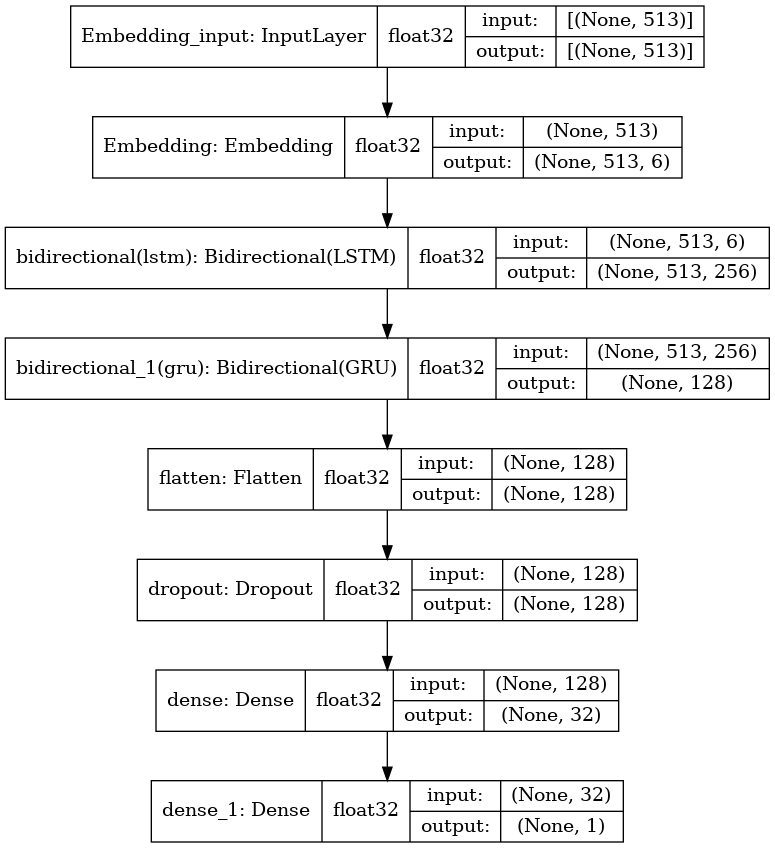

In [60]:
plot_model(model, show_dtype=True, show_layer_names=True, show_shapes=True)

In [61]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<a id="12"></a>

## <b>12 <span style='color:#4a8fdd'>|</span> TRAINING MODEL</b>

In [62]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=15, batch_size=100)

2022-05-25 14:23:36.373653: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-05-25 14:23:42.106264: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


69/69 [==============================] - 18s 153ms/step - loss: 0.4346 - accuracy: 0.8064 - val_loss: 0.1839 - val_accuracy: 0.9287
Epoch 2/15
69/69 [==============================] - 10s 138ms/step - loss: 0.1210 - accuracy: 0.9564 - val_loss: 0.1258 - val_accuracy: 0.9599
Epoch 3/15
69/69 [==============================] - 9s 137ms/step - loss: 0.0676 - accuracy: 0.9781 - val_loss: 0.1030 - val_accuracy: 0.9661
Epoch 4/15
69/69 [==============================] - 9s 137ms/step - loss: 0.0464 - accuracy: 0.9859 - val_loss: 0.1510 - val_accuracy: 0.9613
Epoch 5/15
69/69 [==============================] - 9s 138ms/step - loss: 0.0396 - accuracy: 0.9874 - val_loss: 0.1236 - val_accuracy: 0.9630
Epoch 6/15
69/69 [==============================] - 9s 138ms/step - loss: 0.0328 - accuracy: 0.9910 - val_loss: 0.1131 - val_accuracy: 0.9630
Epoch 7/15
69/69 [==============================] - 9s 138ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.1248 - val_accuracy: 0.9683
Epoch 8/15
69/6

In [63]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
epoch = [i + 1 for i in range(len(train_acc))]

<a id="13"></a>

## <b>13 <span style='color:#4a8fdd'>|</span> VISUALIZING ACCURACY & LOSS</b>

In [64]:
acc_loss_df = pd.DataFrame({"Training Loss" : train_loss,
                            "Validation Loss": val_loss,
                            "Train Accuracy" : train_acc,
                            "Validation Accuracy" : val_acc,
                            "Epoch":epoch})


acc_loss_df.style.bar(color = COLOR)

,Training Loss,Validation Loss,Train Accuracy,Validation Accuracy,Epoch
0,0.434570,0.183949,0.806371,0.928666,1
1,0.121019,0.125821,0.956400,0.959930,2
2,0.067591,0.102999,0.978127,0.966094,3
3,0.046409,0.151028,0.985907,0.961251,4
4,0.039588,0.123599,0.987375,0.963012,5
5,0.032809,0.113102,0.991045,0.963012,6
6,0.031125,0.124783,0.990164,0.968296,7
7,0.023455,0.142036,0.993541,0.967415,8
8,0.022171,0.141063,0.993247,0.969617,9
9,0.015206,0.171591,0.996183,0.962131,10


In [65]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Train Accuracy'],
                         mode='lines+markers',
                         name='Training Accuracy'))

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Validation Accuracy'],
                         mode='lines+markers',
                         name = 'Validation Accuracy'))

fig.update_layout(title = {'text': "<b>Training Accuracy Vs Validation Accuracy</b>\n",
                           'xanchor': 'center',
                           'yanchor': 'top',
                           'y':0.9,'x':0.5,},
                  xaxis_title="Epoch",
                  yaxis_title = "Accuracy",
                  title_font = dict(size = 20))

fig.layout.template = 'plotly_dark'

fig.show()

In [66]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Training Loss'],
                         mode='lines+markers',
                         name='Training Loss'))

fig.add_trace(go.Scatter(x = acc_loss_df['Epoch'],
                         y = acc_loss_df['Validation Loss'],
                         mode='lines+markers',
                         name = 'Validation Loss'))

fig.update_layout(title = {'text': "<b>Training Loss Vs Validation Loss</b>\n",
                           'xanchor': 'center',
                           'yanchor': 'top',
                           'y':0.9,'x':0.5,},
                  xaxis_title="Epoch",
                  yaxis_title = "Loss",
                  title_font = dict(size = 20))

fig.layout.template = 'plotly_dark'

fig.show()

<a id="14"></a>

## <b>14 <span style='color:#4a8fdd'>|</span> MODEL EVALUATION</b>

In [67]:
loss, acc = model.evaluate(X_test, y_test)

71/71 [==============================] - 3s 35ms/step - loss: 0.1982 - accuracy: 0.9608


In [68]:
acc = np.round(acc, 2) * 100 
loss = np.round(loss, 2) * 100

print(f"Accuracy on unseen data is: { acc } %")
print(f'Loss on unseen data is: { loss } %')

Accuracy on unseen data is: 96.0 %
Loss on unseen data is: 20.0 %


<a id="15"></a>

## <b>15 <span style='color:#4a8fdd'>|</span> CLASSIFICATION REPORT</b>

In [69]:
pred = (model.predict(X_test) > 0.5).astype("int32")

In [70]:
print(classification_report(y_test, pred, target_names = ['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.96      0.96      1199
        Spam       0.95      0.96      0.96      1072

    accuracy                           0.96      2271
   macro avg       0.96      0.96      0.96      2271
weighted avg       0.96      0.96      0.96      2271



<a id="16"></a>

## <b>16 <span style='color:#4a8fdd'>|</span> CONFUSION MATRIX</b>

In [71]:
cm = confusion_matrix(y_test,pred)
cm

array([[1148,   51],
       [  38, 1034]])

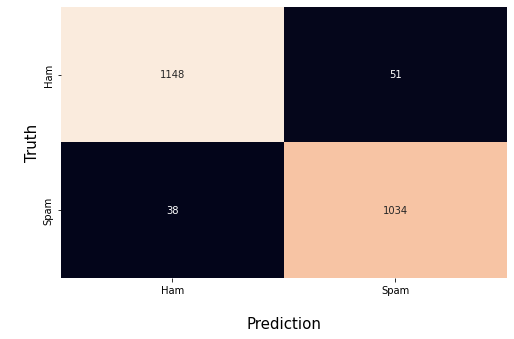

In [72]:
classes = ['Ham','Spam']

plt.figure(figsize = (8,5))
sns.heatmap(cm, annot = True, fmt = 'd', cbar=False).set(xticklabels = classes, yticklabels = classes)
plt.xlabel("\nPrediction", size = 15)
plt.ylabel("\nTruth",  size = 15)
plt.show()

<a id="17"></a>

## <b>17 <span style='color:#4a8fdd'>|</span> MODEL PREDICTION</b>

In [73]:
def predict_category(text):
    text = remove_punctuation(text)
    text = text.lower()
    
    encoded_text = [one_hot(text, VOCAB_SIZE)]
    padded_text = pad_sequences(encoded_text, maxlen=MAX_LEN, padding='post')
    
    pred = (model.predict(padded_text) > 0.5).astype("int32")
    pred = pred.flatten()[0]
    
    return "SPAM" if pred == 1 else "HAM"

In [74]:
text = "Get free service and win a prize just call this number 12103239293"

category = predict_category(text)

print(f"Text is: {text}\n")
print(f"Category: {category}")

Text is: Get free service and win a prize just call this number 12103239293

Category: SPAM


In [76]:
text = "WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! claim"

category = predict_category(text)

print(f"Text is: {text}\n")
print(f"Category: {category}")

Text is: WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! claim

Category: SPAM


In [77]:
text = "Clcik this link to win prize"

category = predict_category(text)

print(f"Text is: {text}\n")
print(f"Category: {category}")

Text is: Clcik this link to win prize

Category: HAM


In [78]:
text = "Hi, we are going for trip this weekend"

category = predict_category(text)

print(f"Text is: {text}\n")
print(f"Category: {category}")

Text is: Hi, we are going for trip this weekend

Category: HAM


In [79]:
text = "Did you make a tea?"

category = predict_category(text)

print(f"Text is: {text}\n")
print(f"Category: {category}")

Text is: Did you make a tea?

Category: HAM


In [80]:
text = "Your free trail is going to end, renew it"

category = predict_category(text)

print(f"Text is: {text}\n")
print(f"Category: {category}")

Text is: Your free trail is going to end, renew it

Category: HAM
